In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("./datasets/insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
...,...,...
22,40,1
23,45,1
24,50,1
25,54,1


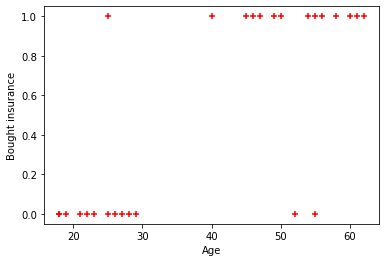

In [6]:
plt.scatter(df.age, df.bought_insurance, marker='+', color='red')
plt.xlabel('Age')
plt.ylabel('Bought insurance')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']], df.bought_insurance, test_size=0.1)

In [10]:
X_test

,age
12,27
15,55
14,49


In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model = LogisticRegression()

In [14]:
model.fit(X_train, y_train)

LogisticRegression()

In [15]:
model.predict(X_test)

array([0, 1, 1], dtype=int64)

In [16]:
model.score(X_test, y_test)

1.0

In [17]:
model.predict_proba(X_test)

array([[0.82019863, 0.17980137],
       [0.1228114 , 0.8771886 ],
       [0.22801549, 0.77198451]])

In [19]:
model.predict([[25]])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [23]:
df = pd.read_csv("./datasets/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [24]:
df_left = df[df.left == 1]
df_left.shape

(3571, 10)

In [25]:
df_retained = df[df.left==0]
df_retained.shape

(11428, 10)

In [28]:
df.groupby('left')['left'].count()

left
0    11428
1     3571
Name: left, dtype: int64

In [26]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [29]:
pd.crosstab(df.salary, df.left)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


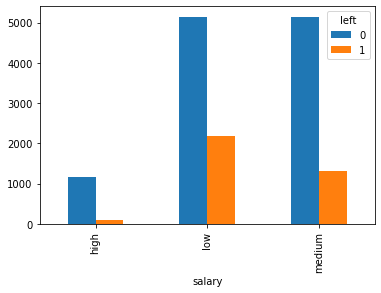

In [35]:
pd.crosstab(df.salary, df.left).plot(kind='bar');

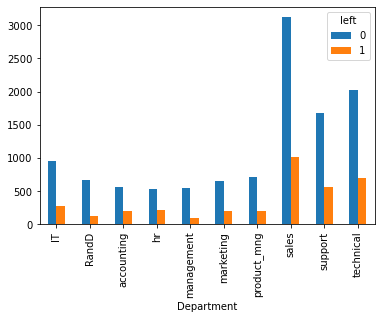

In [37]:
pd.crosstab(df.Department, df.left).plot(kind='bar');

In [38]:
df1 = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
df1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [39]:
dummies = pd.get_dummies(df1.salary, prefix="salary")
dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [40]:
df2 = pd.concat([df1, dummies], axis='columns')
df2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [41]:
df2.drop('salary', axis='columns', inplace=True)
df2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [42]:
X = df2
y = df.left

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [45]:
model = LogisticRegression()

In [46]:
model.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
model.score(X_test, y_test)

0.7722222222222223